In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
h = open('input2.txt', 'r')

content = h.readlines()
N_nodes = int(content[0])

G = np.zeros([N_nodes,N_nodes])

for line in range(1,len(content)):
  num = content[line].split(" ")
  i = int(num[1])-1
  j = int(num[2])-1
  G[i,j]=1
  G[j,i]=1

print(G)

[[0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Colour Arrangement [1. 3. 4. 2. 1. 1. 3. 2. 2. 3. 0. 0. 0. 0. 4. 0. 4. 2. 2. 2. 1. 4. 3.]
Min Chromatic Number 5
Violations 0


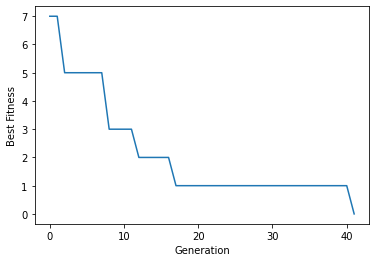

In [ ]:
MaxColors = N_nodes
N_Colors = 0
Npop = 100 
MaxGeneration = 300
chromosome = np.zeros((Npop,N_nodes))
bestsol=[]
while Violations(G,bestsol)!=0 and N_Colors<=MaxColors:
  fitness = []
  N_Colors = N_Colors + 1
  #Population generation
  for i in range(0,Npop):
      chromosome[i] = generateindividual(N_nodes, N_Colors)
# Genetic Optimization:
  costs = np.zeros(Npop) 
  best = np.ones(MaxGeneration)
  for iter in range(0,MaxGeneration):
      for i in range(0,Npop):
          costs[i] = cost_fcn(chromosome[i], G, N_nodes)
      best[iter] = min(costs)
      fitness.append(best[iter])
      bestIDX = np.argmin(costs)
      bestsol = chromosome[bestIDX]
      if best[iter] == 0:
          break
      sortIDX = np.argsort(costs)
      bests = sortIDX[1:int(Npop / 2)]
      for i in np.arange(0,len(bests)-1,2):
          parent1 = chromosome[bests[i]]
          parent2 = chromosome[bests[i + 1]]
          child1 = crossover(parent1, parent2)
          child2 = crossover(parent2, parent1)
          child1 = mutation(child1, N_Colors)
          child2 = mutation(child2, N_Colors)
          chromosome[sortIDX[len(sortIDX) - i - 1]]= child1
          chromosome[sortIDX[len(sortIDX) - i - 2]]= child2
      if iter == MaxGeneration:
          print('Maximum Number of Generation Reached!')
          if best(iter) > 0:
              print('Input Graph and input number of colors has cost for GCP')
print('Colour Arrangement',bestsol)
print('Min Chromatic Number',N_Colors)
print('Violations',Violations(G,bestsol))

plt.plot(range(len(fitness)),fitness)
plt.ylabel('Best Fitness')
plt.xlabel('Generation')
plt.show()

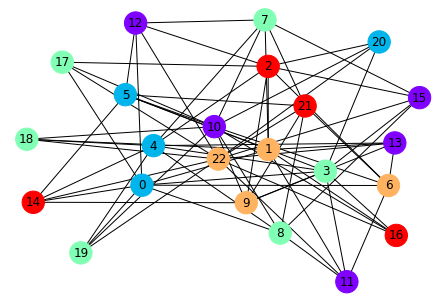

In [ ]:
colorList = list(set(bestsol))
colors = plt.cm.rainbow(np.linspace(0, 1, len(colorList)))

colorMap = []
for i in range(N_nodes):
    color = colors[colorList.index(bestsol[i])]
    colorMap.append(color)



def plotGraph(adjacency_matrix,noofnodes):
    gr = nx.from_numpy_matrix(adjacency_matrix)  
    nx.draw(gr, node_size=500, node_color=colorMap, with_labels=True)
    plt.show()

plotGraph(G,N_nodes)

In [ ]:
print(Violations(G,bestsol))

0


In [ ]:
def Violations(G,solution):
  if len(solution)==0:
    violations=100
  else:
    violations=0
    for i in range(0,N_nodes):
      for j in range(i,N_nodes):
        if i != j:
          if G[i,j] == 1:
            if solution[i]==solution[j]:
              violations=violations+1

  return violations            

In [ ]:
def cost_fcn(chromosome, G, N_nodes):
  violations=0
  for i in range(0,N_nodes):
    for j in range(i,N_nodes):
      if i != j:
        if G[i,j] == 1:
          if chromosome[i]==chromosome[j]:
            violations=violations+1
  C = violations
  return C


In [ ]:
def crossover(parent1, parent2):
    child = parent1
    if random.uniform(0,1) < 0.9:
      cross_point = round(len(parent1) / 2)
      child[cross_point:len(parent1)] = parent2[cross_point:len(parent1)]
    return child

In [ ]:
def generateindividual(N_nodes, N_Colors):
    C = np.concatenate((np.random.permutation(N_Colors),[random.choice(list(range(N_Colors))) for _ in range(N_nodes-N_Colors)]))
    return C

In [ ]:
def mutation(child, N_Colors):
    new_child = child
    if random.uniform(0,1) < 0.5:
        new_child[random.randint(0,len(child)-1)] = random.choice(list(range(N_Colors)))
    return new_child